## HW 11 - Data fitting with various functions - Due Monday Nov 8, 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LogG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit {\bf  GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit {\bf NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

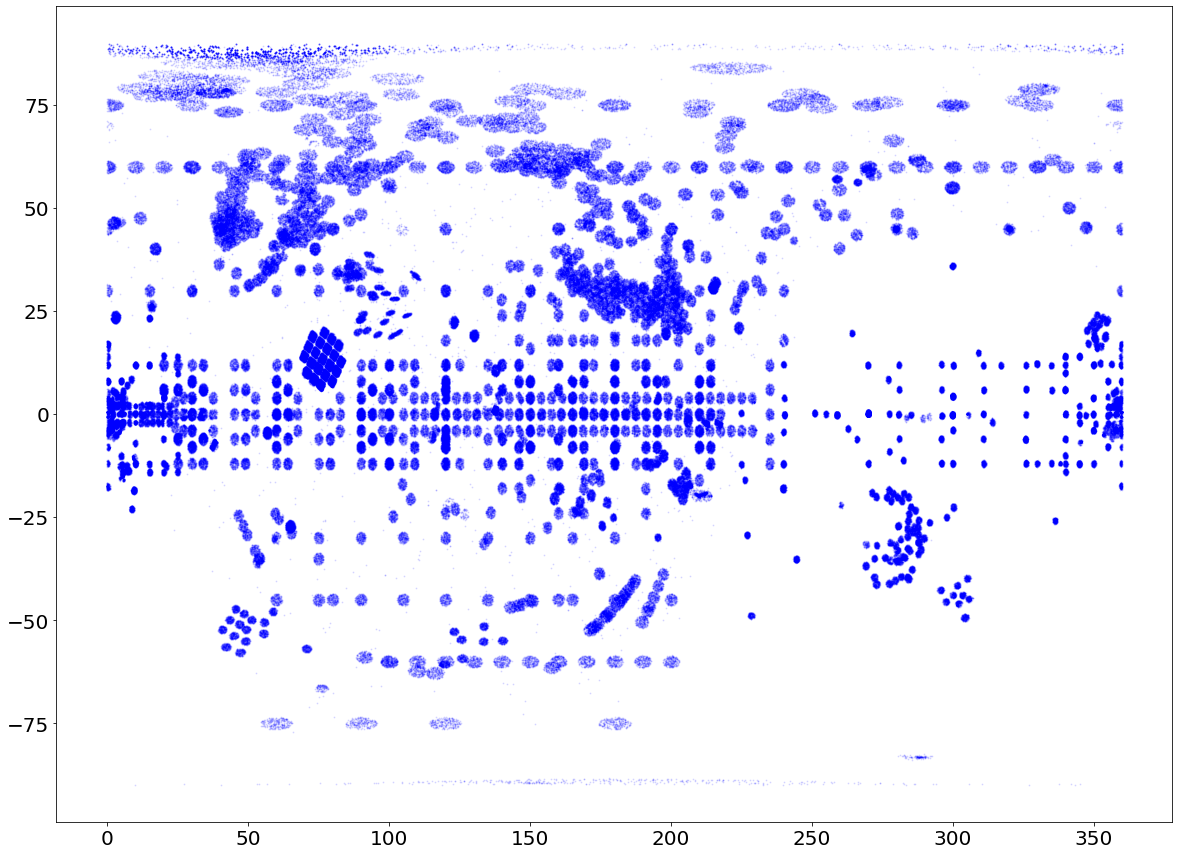

In [98]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt
def mcFit2(func, x, y, x_err, y_err, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, x_err, y_err,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 100
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))



# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][good],star['GLAT'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

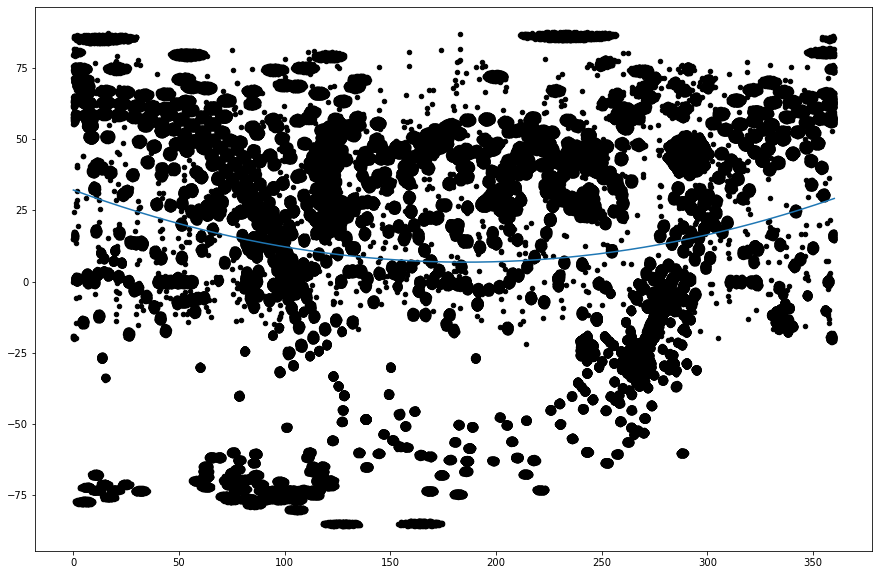

In [2]:
def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c
popt, pcov = opt.curve_fit(poly2, star['RA'], star['DEC'])
xplot= np.linspace(0,360,1000)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['RA'],star['DEC'],s=20,c='black')
ax.plot(xplot,poly2(xplot, *popt))

In [3]:

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


LINEAR:  0.0009224184400344754 -1.472785272049217
poly3:  -7.997651702209631e-11 1.2268049778647489e-06 -0.0051280833140462815 8.136491799033205


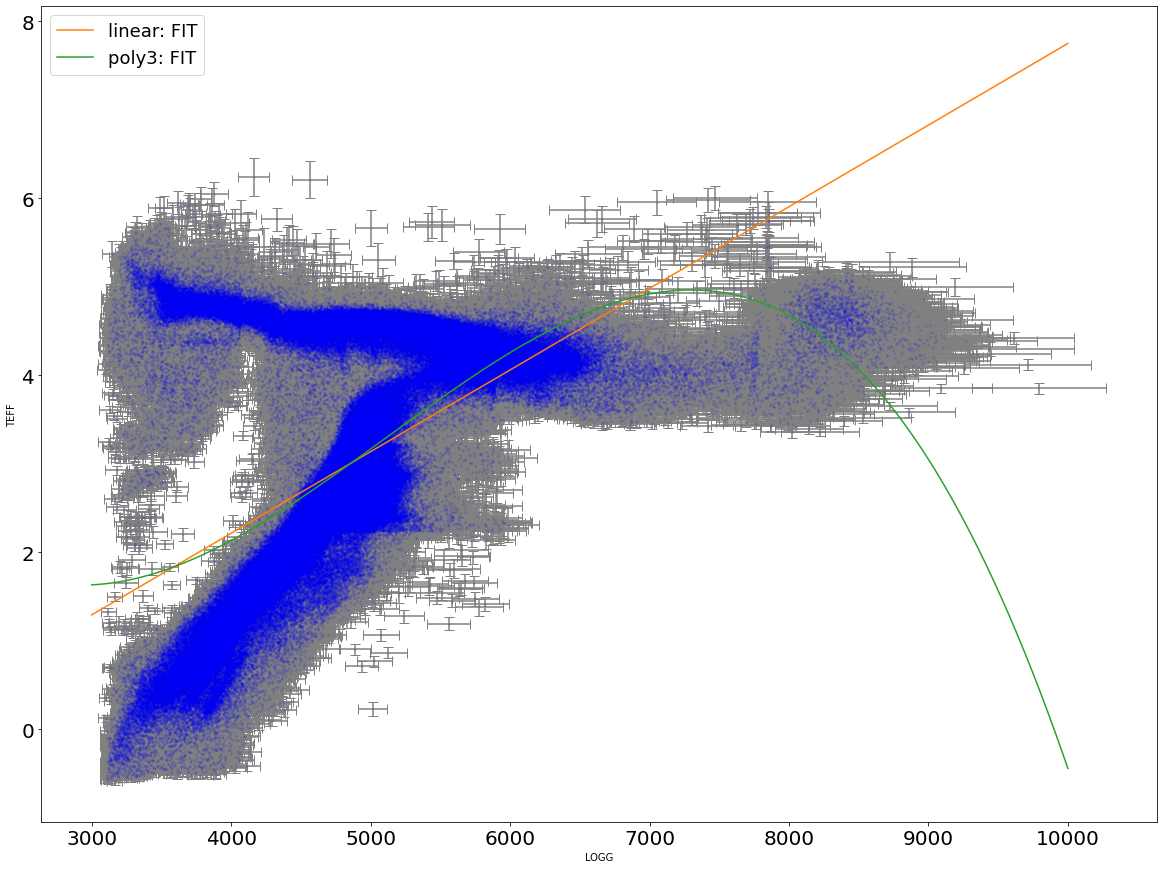

In [7]:

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &(np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['TEFF'] > -9000) & (star['LOGG'] > -9000)
cut1 = np.where(ct1)[0]

slope, intercept = mcFit2(linear, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF_ERR'][cut1], star['LOGG_ERR'][cut1])
print("LINEAR: ",slope, intercept)

prA,prB,prC,prD = mcFit4(poly3, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF_ERR'][cut1], star['LOGG_ERR'][cut1])
print("poly3: ",prA,prB,prC,prD)

fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['TEFF'][cut1],star['LOGG'][cut1],s=3,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][cut1]),star['LOGG'][cut1], xerr=(star['TEFF_ERR'][cut1]), yerr=(star['LOGG_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)


x_plot = np.linspace(3000,10000,1000) 

ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
ax1.plot(x_plot,poly3(x_plot, prA, prB, prC, prD), label='poly3: FIT')


plt.xlabel('LOGG')
plt.ylabel('TEFF')

plt.legend(loc='best', fontsize=18)
plt.show()


<ipython-input-33-ca911863956a>:84: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


logfit:  5.931863214655914 0.8513446721722517 1212.6327661185942 -48.156584716878285


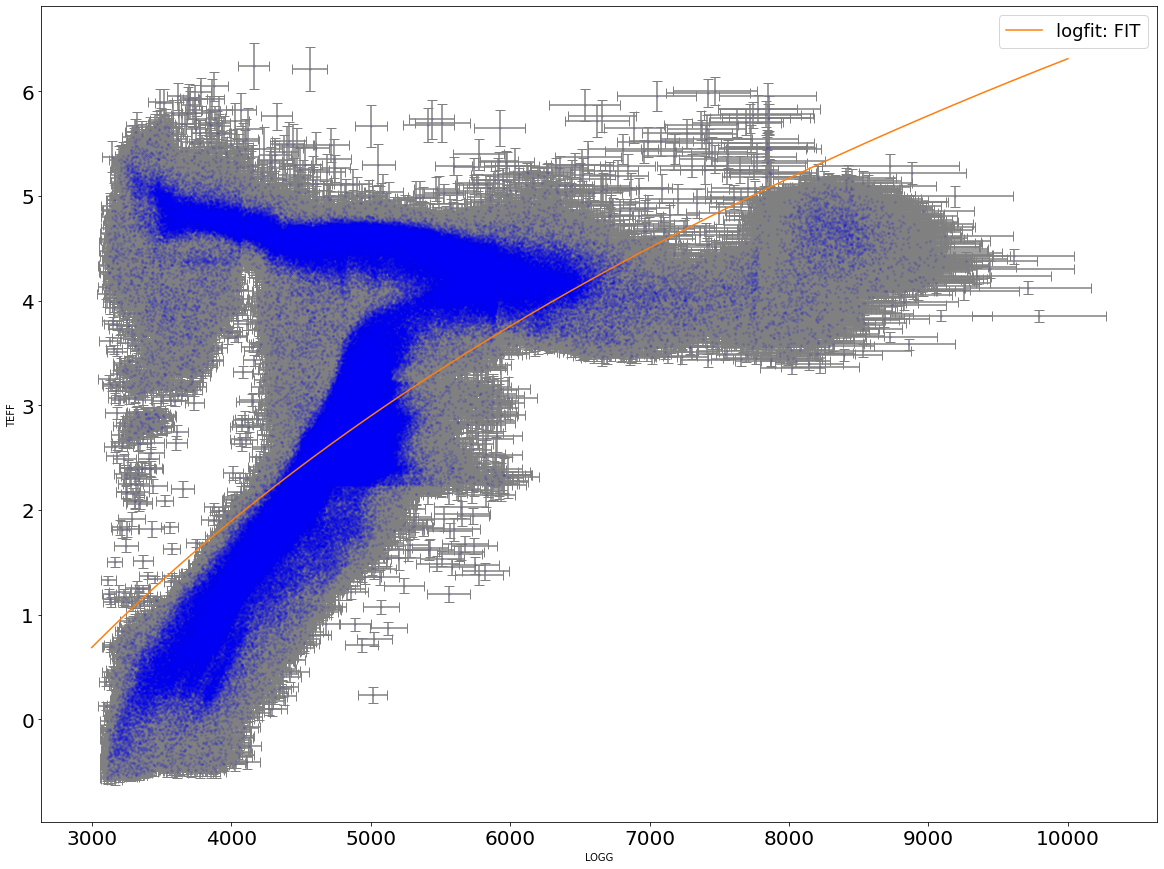

In [34]:

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &(np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['TEFF'] > -9000) & (star['LOGG'] > -9000)
cut1 = np.where(ct1)[0]

prA, prB, prC, prD = mcFit4(logfit, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF_ERR'][cut1], star['LOGG_ERR'][cut1])
print("logfit: ",prA, prB, prC, prD)

fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['TEFF'][cut1],star['LOGG'][cut1],s=3,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][cut1]),star['LOGG'][cut1], xerr=(star['TEFF_ERR'][cut1]), yerr=(star['LOGG_ERR'][cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)


x_plot = np.linspace(3000,10000,1000) 

ax1.plot(x_plot,logfit(x_plot,prA, prB, prC, prD), label='logfit: FIT')

plt.xlabel('LOGG')
plt.ylabel('TEFF')

plt.legend(loc='best', fontsize=18)
plt.show()


gausian:  -5.191241703655717 5.668782326360498
sigmoid:  -0.2991198303943197 6.690047255238859 -0.27198893427592796 0.2534696039814893
poly3:  0.018399413588683737 -0.04180663934868532 -0.29415609019098676 0.03228772140858327


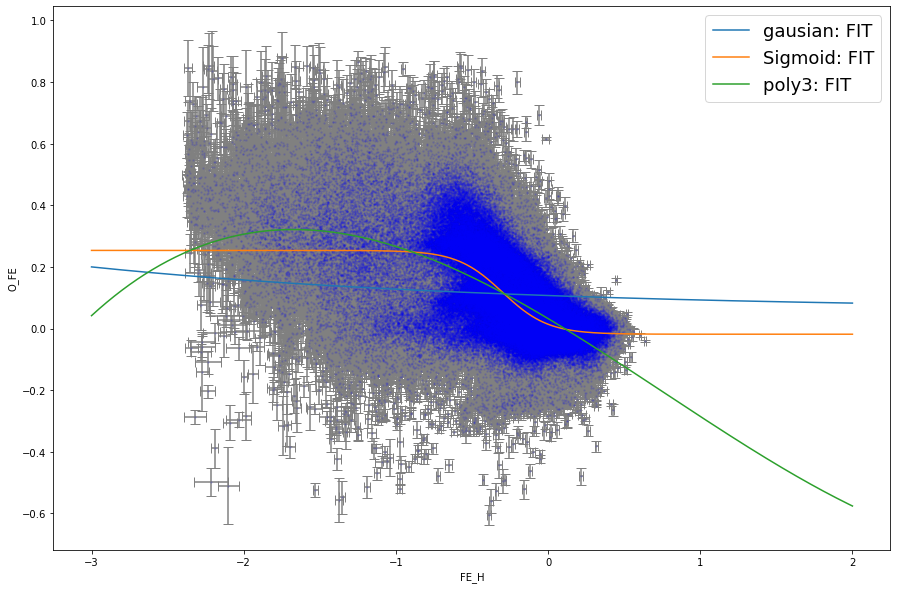

In [60]:
ct2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['FE_H'] > -9000) & (star['O_FE'] > -9000) & ((star['GLAT'] > 10) | (star['GLAT'] < -10))
cut2 = np.where(ct2)[0]

mu,sigma = mcFit2(gausian, star['FE_H'][cut2], star['O_FE'][cut2], star['FE_H_ERR'][cut2], star['O_FE_ERR'][cut2])
print("gausian: ",mu, sigma)

feoA,feoB,feoC,feoD= mcFit4(sigmoid,star['FE_H'][cut2], star['O_FE'][cut2], star['FE_H_ERR'][cut2], star['O_FE_ERR'][cut2])
print("sigmoid: ",feoA, feoB,feoC,feoD)

plA,plB,plC,plD = mcFit4(poly3, star['FE_H'][cut2], star['O_FE'][cut2], star['FE_H_ERR'][cut2], star['O_FE_ERR'][cut2])
print("poly3: ",plA,plB,plC,plD)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][cut2],star['O_FE'][cut2],s=2,c='b',alpha=0.1)
x_plot = np.linspace(-3,2,1000)
ax.plot(x_plot,gausian(x_plot,mu,sigma), label='gausian: FIT')
ax.plot(x_plot,sigmoid(x_plot,feoA,feoB,feoC,feoD),label='Sigmoid: FIT')
ax.plot(x_plot,poly3(x_plot, plA, plB, plC, plD), label='poly3: FIT')
ax.errorbar((star['FE_H'][cut2]),star['O_FE'][cut2], xerr=(star['FE_H_ERR'][cut2]), yerr=(star['O_FE_ERR'][cut2]), ecolor='grey',fmt='none', capsize=5, zorder=0)


plt.xlabel('FE_H')
plt.ylabel('O_FE')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  -0.20999642964090448 0.043734419540522096
poly3:  0.06088794902051209 0.07211974519706803 -0.22441842026676473 0.03716298466442583
sigmoid:  -0.3320010125211312 5.669350650439007 -0.27169065567251227 0.2595734628508497


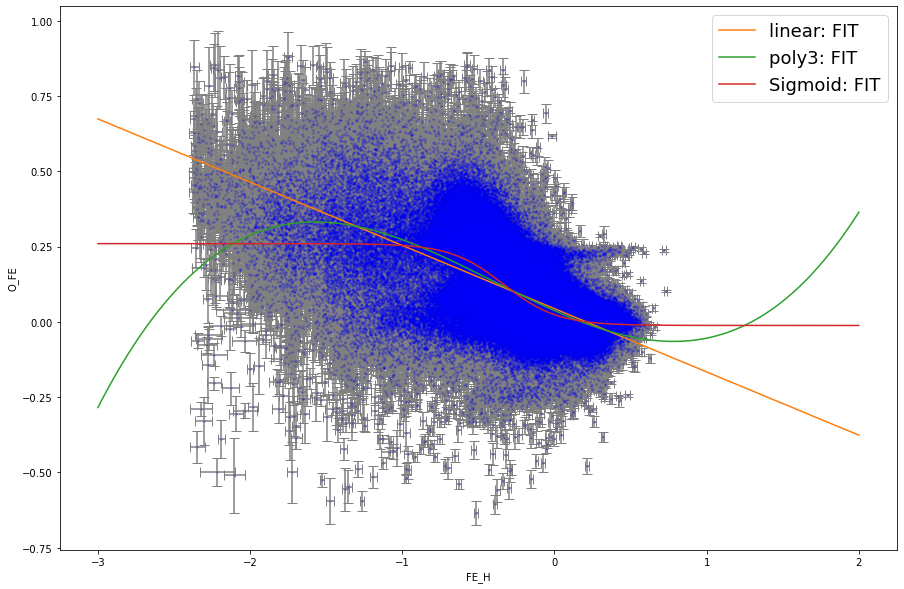

In [61]:
ct3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['FE_H'] > -9000) & (star['O_FE'] > -9000) & ((star['GLAT'] > -2) | (star['GLAT'] < 2))
cut3 = np.where(ct3)[0]

slope, intercept = mcFit2(linear, star['FE_H'][cut3], star['O_FE'][cut3], star['FE_H_ERR'][cut3], star['O_FE_ERR'][cut3])
print("LINEAR: ",slope, intercept)

plA,plB,plC,plD = mcFit4(poly3, star['FE_H'][cut3], star['O_FE'][cut3], star['FE_H_ERR'][cut3], star['O_FE_ERR'][cut3])
print("poly3: ",plA,plB,plC,plD)

feoA,feoB,feoC,feoD= mcFit4(sigmoid,star['FE_H'][cut3], star['O_FE'][cut3], star['FE_H_ERR'][cut3], star['O_FE_ERR'][cut3])
print("sigmoid: ",feoA, feoB,feoC,feoD)



fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][cut3],star['O_FE'][cut3],s=2,c='b',alpha=0.1)
x_plot = np.linspace(-3,2,1000)


ax.scatter(star['FE_H'][cut3],star['O_FE'][cut3],s=3,c='b',alpha=0.1)
ax.errorbar((star['FE_H'][cut3]),star['O_FE'][cut3], xerr=(star['FE_H_ERR'][cut3]), yerr=(star['O_FE_ERR'][cut3]), ecolor='grey',fmt='none', capsize=5, zorder=0)


x_plot = np.linspace(-3,2,1000) 

ax.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
ax.plot(x_plot,poly3(x_plot, plA, plB, plC, plD), label='poly3: FIT')
ax.plot(x_plot,sigmoid(x_plot,feoA,feoB,feoC,feoD),label='Sigmoid: FIT')



plt.xlabel('FE_H')
plt.ylabel('O_FE')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  -0.0002824835407869222 2.0333282898613265


C:\Users\Stone\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


sigmoid:  1.0 1.0 -99.67822442864326 100.3217190439778
poly2:  2.7057553367599696e-08 -0.0005613543337250611 2.7362478118409426


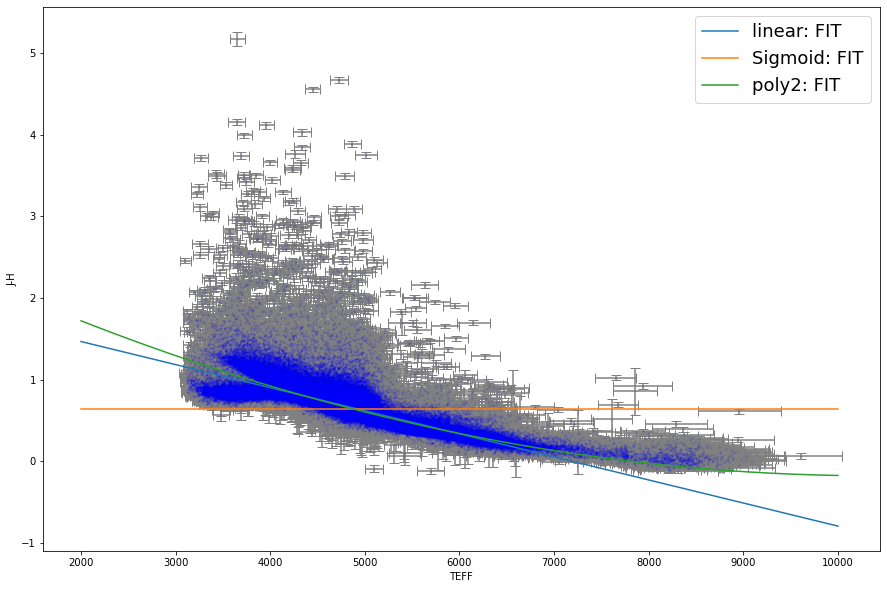

In [63]:
ct4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
(star['TEFF'] > -9000) & (star['J'] > -9000) & (star['K'] > -9000) & (star['J_ERR'] > -9000) &\
(star['K_ERR'] > -9000) & (star['J_ERR'] < 1) & (star['K_ERR'] < 1) & ((star['GLAT'] > 10) | (star['GLAT'] < -10))

cut4 = np.where(ct4)[0]

slope, intercept = mcFit2(linear, star['TEFF'][cut4], star['J'][cut4]-star['K'][cut4], star['TEFF_ERR'][cut4],(np.sqrt(star['J_ERR'][cut4]**2 + star['K_ERR'][cut4]**2  )))
print("LINEAR: ", slope, intercept)
feoA,feoB,feoC,feoD= mcFit4(sigmoid,star['TEFF'][cut4], star['J'][cut4]-star['K'][cut4], star['TEFF_ERR'][cut4],(np.sqrt(star['J_ERR'][cut4]**2 + star['K_ERR'][cut4]**2  )))
print("sigmoid: ",feoA, feoB,feoC,feoD)
plA,plB,plC = mcFit3(poly2, star['TEFF'][cut4], star['J'][cut4]-star['K'][cut4], star['TEFF_ERR'][cut4],(np.sqrt(star['J_ERR'][cut4]**2 + star['K_ERR'][cut4]**2  )))
print("poly2: ",plA,plB,plC)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][cut4],star['J'][cut4]-star['K'][cut4],s=2,c='b',alpha=0.1)
x_plot = np.linspace(2000,10000,1000)
ax.plot(x_plot,linear(x_plot,slope,intercept), label='linear: FIT')
ax.plot(x_plot,sigmoid(x_plot,feoA,feoB,feoC,feoD),label='Sigmoid: FIT')
ax.plot(x_plot,poly2(x_plot,plA,plB,plC),label='poly2: FIT')

ax.errorbar((star['TEFF'][cut4]),star['J'][cut4]-star['K'][cut4], xerr=(star['TEFF_ERR'][cut4]), yerr=(np.sqrt(star['J_ERR'][cut4]**2 + star['K_ERR'][cut4]**2  )), ecolor='grey',fmt='none', capsize=5, zorder=0)


plt.xlabel('TEFF')
plt.ylabel('J-H')

plt.legend(loc='best', fontsize=18)
plt.show()


cosine:  3.0941928428080523 0.9727879757639664 0.3337722688790427 -1.110780090686819
poly2:  -5.227244945626285e-05 0.22794505969122275 -34.169696374365586
LINEAR:  0.21016329533427486 -33.10863712710077


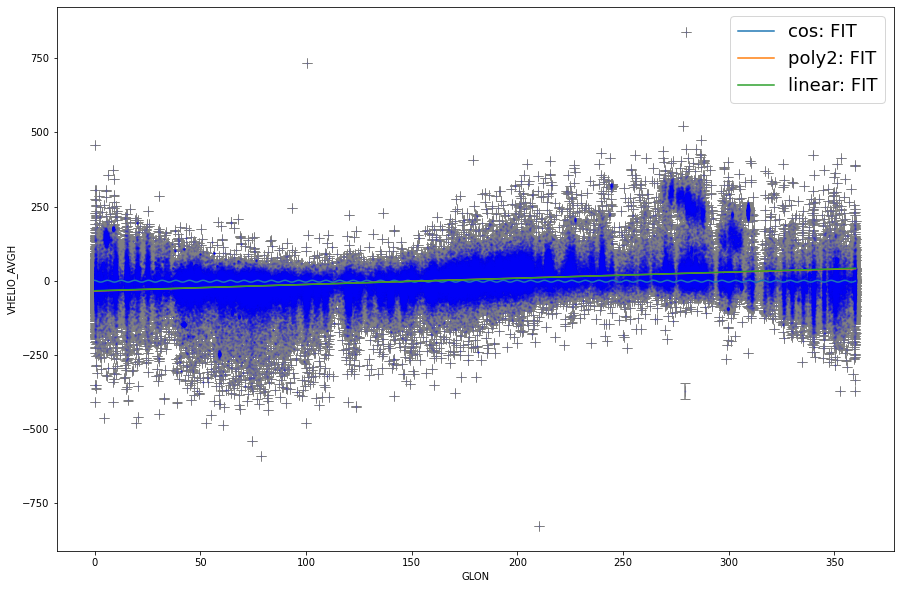

In [86]:
ct5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLON'] > -9000) & (star['VHELIO_AVG'] > -9000) & ((star['GLAT'] > -10) & (star['GLAT'] < 10))
cut5 = np.where(ct4)[0]

gvA,gvB,gvC,gvD= mcFit4(cosfit,star['GLON'][cut5], star['VHELIO_AVG'][cut5], 0, star['VERR'][cut5])
print("cosine: ",gvA, gvB,gvC,gvD)
plA,plB,plC = mcFit3(poly2, star['GLON'][cut5], star['VHELIO_AVG'][cut5], 0,star['VERR'][cut5])
print("poly2: ",plA,plB,plC)
slope, intercept = mcFit2(linear, star['GLON'][cut5], star['VHELIO_AVG'][cut5], 0, star['VHELIO_AVG'][cut5])
print("LINEAR: ",slope, intercept)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][cut5],star['VHELIO_AVG'][cut5],s=2,c='b',alpha=0.1)
x_plot = np.linspace(0,360,1000)
ax.plot(x_plot,cosfit(x_plot,gvA,gvB,gvC,gvD), label='cos: FIT')
ax.plot(x_plot,poly2(x_plot,plA,plB,plC), label='poly2: FIT')
ax.plot(x_plot,linear(x_plot,slope,intercept), label='linear: FIT')


ax.errorbar((star['GLON'][cut5]),star['VHELIO_AVG'][cut5], xerr=0, yerr=(star['VERR'][cut5]), ecolor='grey',fmt='none', capsize=5, zorder=0)


plt.xlabel('GLON')
plt.ylabel('VHELIO_AVGH')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  0.06599257551421162 0.16149493390438374
lorentzian_cauchy:  20.328631823501112 9.40294034823877 1.6373185948703952
poly3:  0.00012454448516008298 -0.007468418421312073 0.1641680940919583 -0.04445101092433737


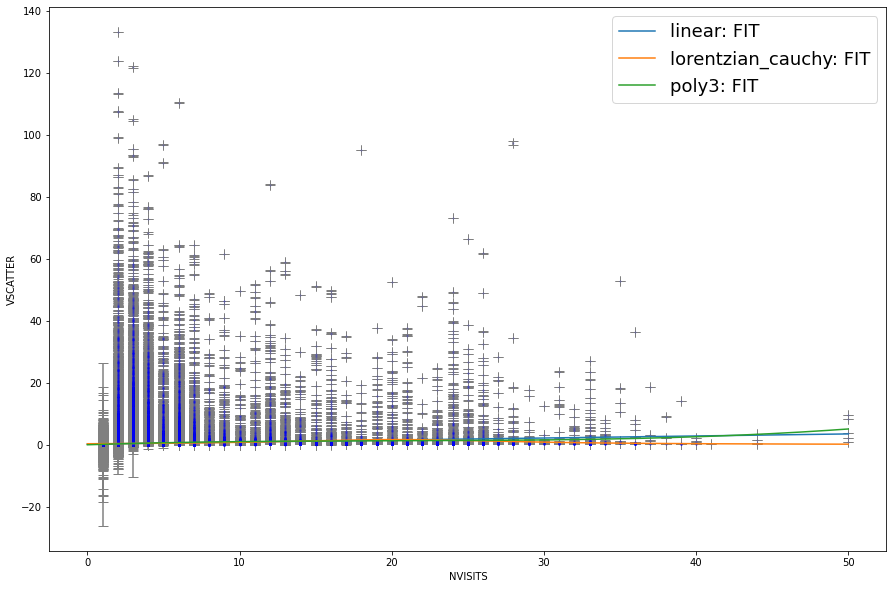

In [102]:
ct6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['NVISITS'] > -9000) & (star['VSCATTER'] > -9000) & ((star['NVISITS'] > 1) | (star['NVISITS'] == 1))
cut6 = np.where(ct6)[0]

slope, intercept = mcFit2(linear, star['NVISITS'][cut6], star['VSCATTER'][cut6], 0, star['VERR'][cut6])
print("LINEAR: ",slope, intercept)
nsA,nsB,nsC = mcFit3(lorentzian_cauchy, star['NVISITS'][cut6], star['VSCATTER'][cut6], 0, star['VERR'][cut6],)
print("lorentzian_cauchy: ",nsA,nsB,nsC)
plA,plB,plC,plD = mcFit4(poly3, star['NVISITS'][cut6], star['VSCATTER'][cut6], 0, star['VERR'][cut6])
print("poly3: ",plA,plB,plC,plD)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][cut6],star['VSCATTER'][cut6],s=2,c='b',alpha=0.1)
x_plot = np.linspace(0,50,1000)

ax.plot(x_plot,linear(x_plot,slope,intercept), label='linear: FIT')
ax.plot(x_plot,lorentzian_cauchy(x_plot,nsA,nsB,nsC), label='lorentzian_cauchy: FIT')
ax.plot(x_plot,poly3(x_plot,plA,plB,plC,plD), label='poly3: FIT')




ax.errorbar((star['NVISITS'][cut6]),star['VSCATTER'][cut6], xerr=0, yerr=(star['VERR'][cut6]), ecolor='grey',fmt='none', capsize=5, zorder=0)


plt.xlabel('NVISITS')
plt.ylabel('VSCATTER')

plt.legend(loc='best', fontsize=18)
plt.show()


LINEAR:  0.01062914699186034 0.021248801610585247
poly3:  0.022195922790587064 0.05458835498284344 0.03214505564961352 0.020021014878816856
cosine:  -41.00174469649279 -0.024471169164424017 -0.0218938849254122 41.01371298136078


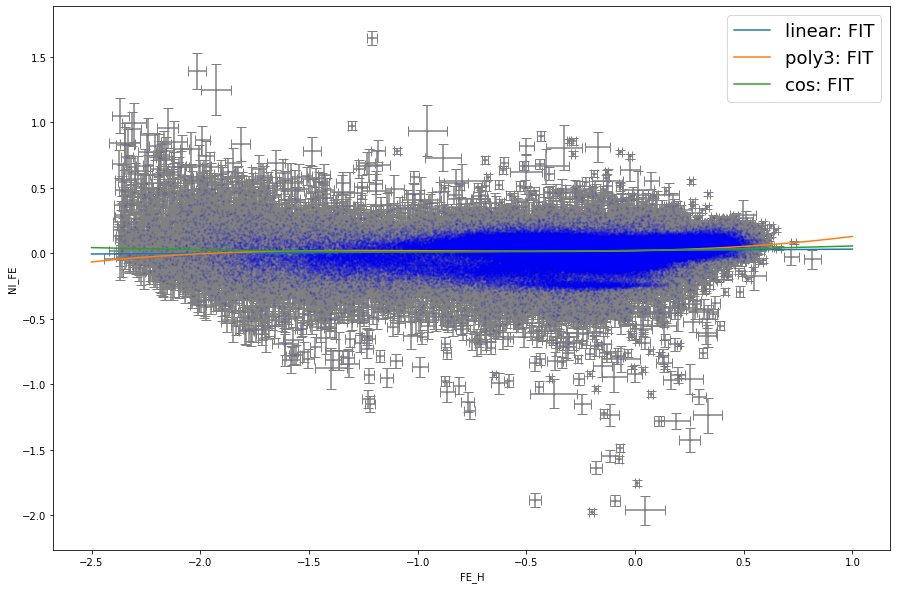

In [113]:
ct7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) & (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['Fe_H'] > -9000) & (star['NI_FE'] > -9000)
cut7 = np.where(ct7)[0]

slope, intercept = mcFit2(linear, star['Fe_H'][cut7], star['NI_FE'][cut7], star['Fe_H_ERR'][cut7],star['NI_FE_ERR'][cut7])
print("LINEAR: ", slope, intercept)
plA,plB,plC,plD = mcFit4(poly3, star['FE_H'][cut7], star['NI_FE'][cut7], star['Fe_H_ERR'][cut7], star['NI_FE_ERR'][cut7])
print("poly3: ",plA,plB,plC,plD)
gvA,gvB,gvC,gvD= mcFit4(cosfit,star['FE_H'][cut7], star['NI_FE'][cut7], star['Fe_H_ERR'][cut7], star['NI_FE_ERR'][cut7])
print("cosine: ",gvA, gvB,gvC,gvD)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][cut7],star['NI_FE'][cut7],s=2,c='b',alpha=0.1)
x_plot = np.linspace(-2.5,1,1000)

ax.plot(x_plot,linear(x_plot,slope,intercept), label='linear: FIT')
ax.plot(x_plot,poly3(x_plot,plA,plB,plC,plD), label='poly3: FIT')
ax.plot(x_plot,cosfit(x_plot,gvA,gvB,gvC,gvD), label='cos: FIT')



ax.errorbar((star['FE_H'][cut7]),star['NI_FE'][cut7], xerr=(star['FE_H_ERR'][cut7]), yerr=(star['NI_FE_ERR'][cut7]), ecolor='grey',fmt='none', capsize=5, zorder=0)


plt.xlabel('FE_H')
plt.ylabel('NI_FE')

plt.legend(loc='best', fontsize=18)
plt.show()